# MACD (Moving Average Convergence Divergence) Indicator

**MACD Formula:**
- **MACD Line** = EMA(12) - EMA(26)
- **Signal Line** = EMA(MACD, 9)
- **Histogram** = MACD - Signal

**Interpretation:**
- **MACD > 0**: Price momentum is bullish (fast EMA above slow EMA)
- **MACD < 0**: Price momentum is bearish (fast EMA below slow EMA)
- **MACD crosses above Signal**: Bullish signal (potential buy)
- **MACD crosses below Signal**: Bearish signal (potential sell)
- **Histogram growing**: Momentum strengthening in current direction
- **Histogram shrinking**: Momentum weakening (possible reversal)
- **Divergence**: Price makes new high but MACD doesn't = potential bearish reversal

**Key Signals:**
1. **Crossover Signal**: Most common, buy on MACD > Signal, sell on MACD < Signal
2. **Zero Line Crossover**: Buy when MACD crosses above 0, sell below 0
3. **Divergence**: Price diverges from MACD (reversal warning)
4. **Histogram Expansion**: Strengthening trend
5. **Histogram Contraction**: Weakening trend or potential reversal

**Common Strategies:**
- Signal crossovers: Buy on MACD cross above signal, sell on cross below
- Zero crossovers: Buy on MACD cross above 0, sell on cross below 0
- Divergence detection: Look for price/MACD divergences for reversal signals
- Histogram confirmation: Use histogram for early trend change detection

In [1]:
from matplotlib.gridspec import GridSpec
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from indikator import macd

plt.style.use('seaborn-v0_8-darkgrid')
np.random.seed(42)

## Scenario 1: Bullish Crossover (MACD Crosses Above Signal Line)
Classic signal-line crossover strategy - one of the most reliable MACD signals

/tmp/sselcuk/ipykernel_1244311/588742813.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  crossover_bullish = macd_above_signal & ~macd_above_signal.shift(1).fillna(False)
/tmp/sselcuk/ipykernel_1244311/588742813.py:34: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  crossover_bearish = ~macd_above_signal & macd_above_signal.shift(1).fillna(False)
/tmp/sselcuk/ipykernel_1244311/588742813.py:99: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


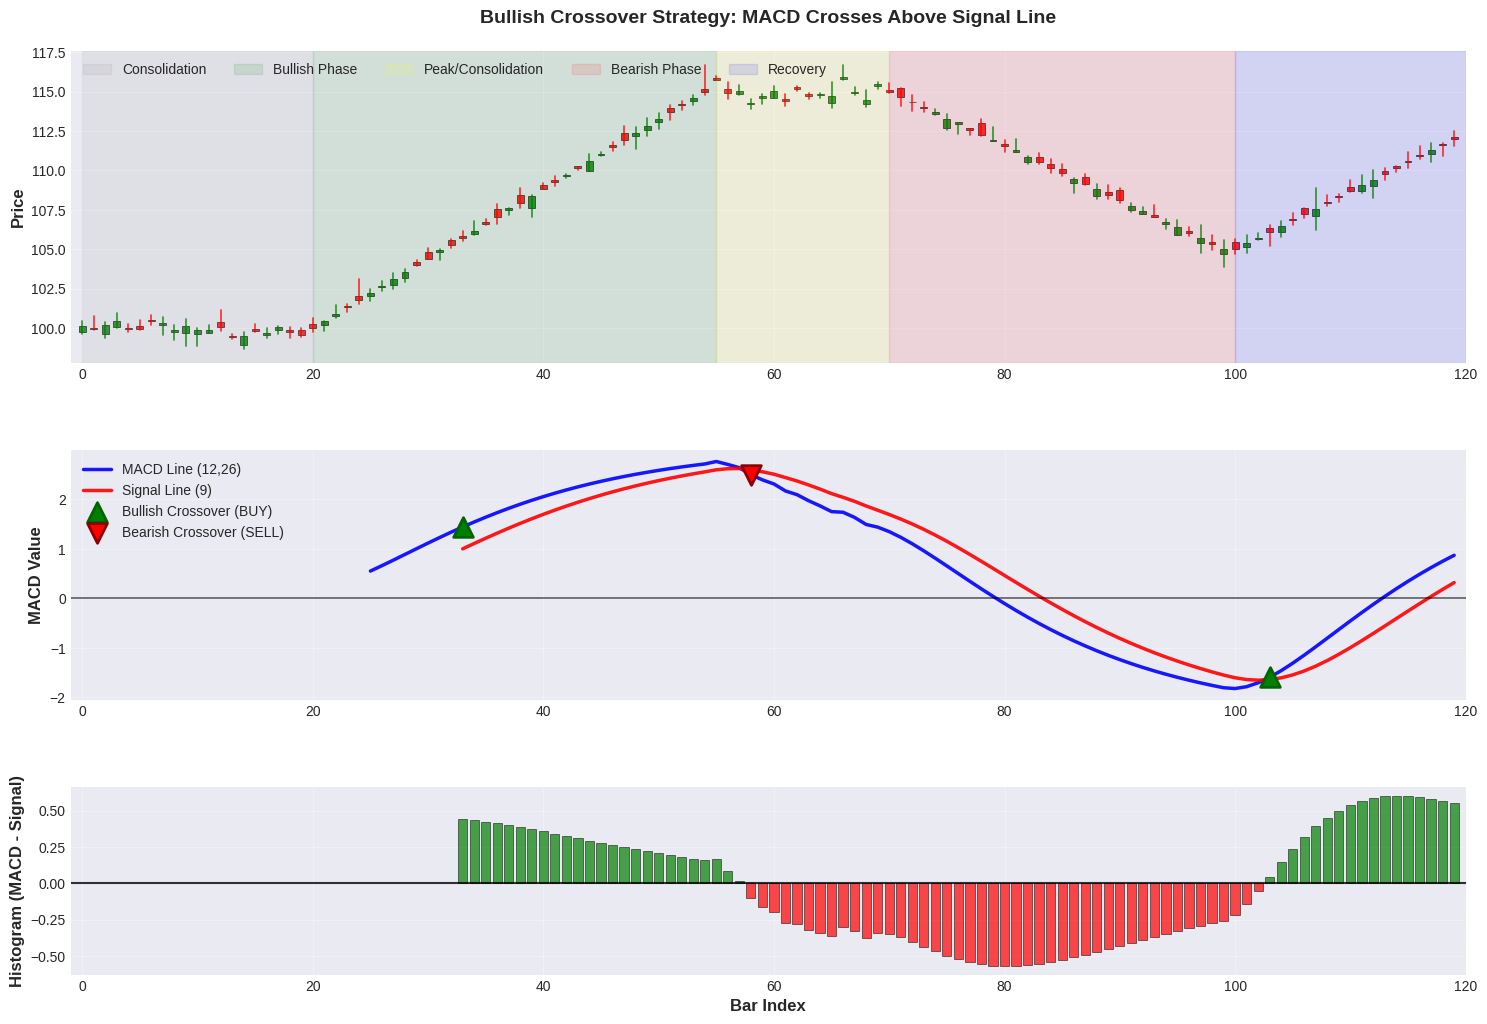


=== CROSSOVER SIGNALS DETECTED ===
Bullish Crossovers: 2
Bearish Crossovers: 1

MACD Range: [-1.8210, 2.7679]
Histogram Range: [-0.5686, 0.6029]


In [2]:
# Create multi-phase price data with clear crossover opportunities
n = 120
dates = pd.date_range('2024-01-01 09:30', periods=n, freq='5min')

# Different trend phases to create crossovers
consolidation = 100 + np.random.randn(20) * 0.3
bullish_move = np.linspace(100, 115, 35)  # Strong uptrend
peak = 115 + np.random.randn(15) * 0.5
bearish_move = np.linspace(115, 105, 30)  # Downtrend
recovery = np.linspace(105, 112, 20)  # Recovery
closes = np.concatenate([consolidation, bullish_move, peak, bearish_move, recovery])

# Create OHLC data
opens = closes + np.random.randn(n) * 0.3
highs = np.maximum(opens, closes) + np.abs(np.random.randn(n)) * 0.4
lows = np.minimum(opens, closes) - np.abs(np.random.randn(n)) * 0.4
volumes = 1000 + np.abs(np.random.randn(n)) * 200

df = pd.DataFrame({
    'open': opens,
    'high': highs,
    'low': lows,
    'close': closes,
    'volume': volumes
}, index=dates)

# Calculate MACD
result = macd(df['close'], fast_period=12, slow_period=26, signal_period=9)
df = pd.concat([df, result], axis=1)

# Detect crossovers
macd_above_signal = df['macd'] > df['macd_signal']
crossover_bullish = macd_above_signal & ~macd_above_signal.shift(1).fillna(False)
crossover_bearish = ~macd_above_signal & macd_above_signal.shift(1).fillna(False)

# Create visualization
fig = plt.figure(figsize=(18, 12))
gs = GridSpec(3, 1, height_ratios=[2.5, 2, 1.5], hspace=0.35)
ax1 = fig.add_subplot(gs[0])
ax2 = fig.add_subplot(gs[1], sharex=ax1)
ax3 = fig.add_subplot(gs[2], sharex=ax1)

# Panel 1: Price with candlesticks
for i in range(len(df)):
    color = 'green' if df['close'].iloc[i] >= df['open'].iloc[i] else 'red'
    ax1.plot([i, i], [df['low'].iloc[i], df['high'].iloc[i]], color=color, linewidth=1.2, alpha=0.8)
    height = abs(df['close'].iloc[i] - df['open'].iloc[i])
    if height < 0.05:
        height = 0.12
    bottom = min(df['open'].iloc[i], df['close'].iloc[i])
    ax1.add_patch(plt.Rectangle((i - 0.3, bottom), 0.6, height, facecolor=color, edgecolor='black', linewidth=0.5, alpha=0.8))

# Mark phases
ax1.axvspan(0, 20, alpha=0.1, color='gray', label='Consolidation')
ax1.axvspan(20, 55, alpha=0.1, color='green', label='Bullish Phase')
ax1.axvspan(55, 70, alpha=0.1, color='yellow', label='Peak/Consolidation')
ax1.axvspan(70, 100, alpha=0.1, color='red', label='Bearish Phase')
ax1.axvspan(100, 120, alpha=0.1, color='blue', label='Recovery')

ax1.set_ylabel('Price', fontsize=12, fontweight='bold')
ax1.set_title('Bullish Crossover Strategy: MACD Crosses Above Signal Line', fontsize=14, fontweight='bold', pad=20)
ax1.grid(True, alpha=0.3)
ax1.legend(loc='upper left', ncol=5, fontsize=10)
ax1.set_xlim(-1, len(df))

# Panel 2: MACD and Signal Line
ax2.plot(range(len(df)), df['macd'].values, 'b-', linewidth=2.5, label='MACD Line (12,26)', alpha=0.9)
ax2.plot(range(len(df)), df['macd_signal'].values, 'r-', linewidth=2.5, label='Signal Line (9)', alpha=0.9)
ax2.axhline(0, color='black', linestyle='-', linewidth=1.2, alpha=0.6)

# Mark crossovers
bullish_indices = df.index[crossover_bullish].tolist()
bearish_indices = df.index[crossover_bearish].tolist()
bullish_bar_indices = [df.index.get_loc(idx) for idx in bullish_indices if idx in df.index]
bearish_bar_indices = [df.index.get_loc(idx) for idx in bearish_indices if idx in df.index]

if bullish_bar_indices:
    ax2.scatter(bullish_bar_indices, df['macd'].iloc[bullish_bar_indices], color='green', s=200, marker='^',
               label='Bullish Crossover (BUY)', zorder=5, edgecolor='darkgreen', linewidth=2)
if bearish_bar_indices:
    ax2.scatter(bearish_bar_indices, df['macd'].iloc[bearish_bar_indices], color='red', s=200, marker='v',
               label='Bearish Crossover (SELL)', zorder=5, edgecolor='darkred', linewidth=2)

ax2.set_ylabel('MACD Value', fontsize=12, fontweight='bold')
ax2.grid(True, alpha=0.3)
ax2.legend(loc='upper left', fontsize=10)
ax2.set_xlim(-1, len(df))

# Panel 3: Histogram
histogram = df['macd_histogram'].values
colors_hist = ['green' if h > 0 else 'red' for h in histogram]
ax3.bar(range(len(df)), histogram, color=colors_hist, alpha=0.7, edgecolor='black', linewidth=0.5)
ax3.axhline(0, color='black', linestyle='-', linewidth=1.5, alpha=0.8)
ax3.set_xlabel('Bar Index', fontsize=12, fontweight='bold')
ax3.set_ylabel('Histogram (MACD - Signal)', fontsize=12, fontweight='bold')
ax3.grid(True, alpha=0.3)
ax3.set_xlim(-1, len(df))

plt.tight_layout()
plt.show()

# Statistics
print('\n=== CROSSOVER SIGNALS DETECTED ===')
print(f'Bullish Crossovers: {crossover_bullish.sum()}')
print(f'Bearish Crossovers: {crossover_bearish.sum()}')
print(f'\nMACD Range: [{df["macd"].min():.4f}, {df["macd"].max():.4f}]')
print(f'Histogram Range: [{df["macd_histogram"].min():.4f}, {df["macd_histogram"].max():.4f}]')

## Scenario 2: Histogram Divergence Detection
Identifying when histogram is shrinking (momentum weakening) versus expanding (momentum strengthening)

/tmp/sselcuk/ipykernel_1244311/1580595321.py:106: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


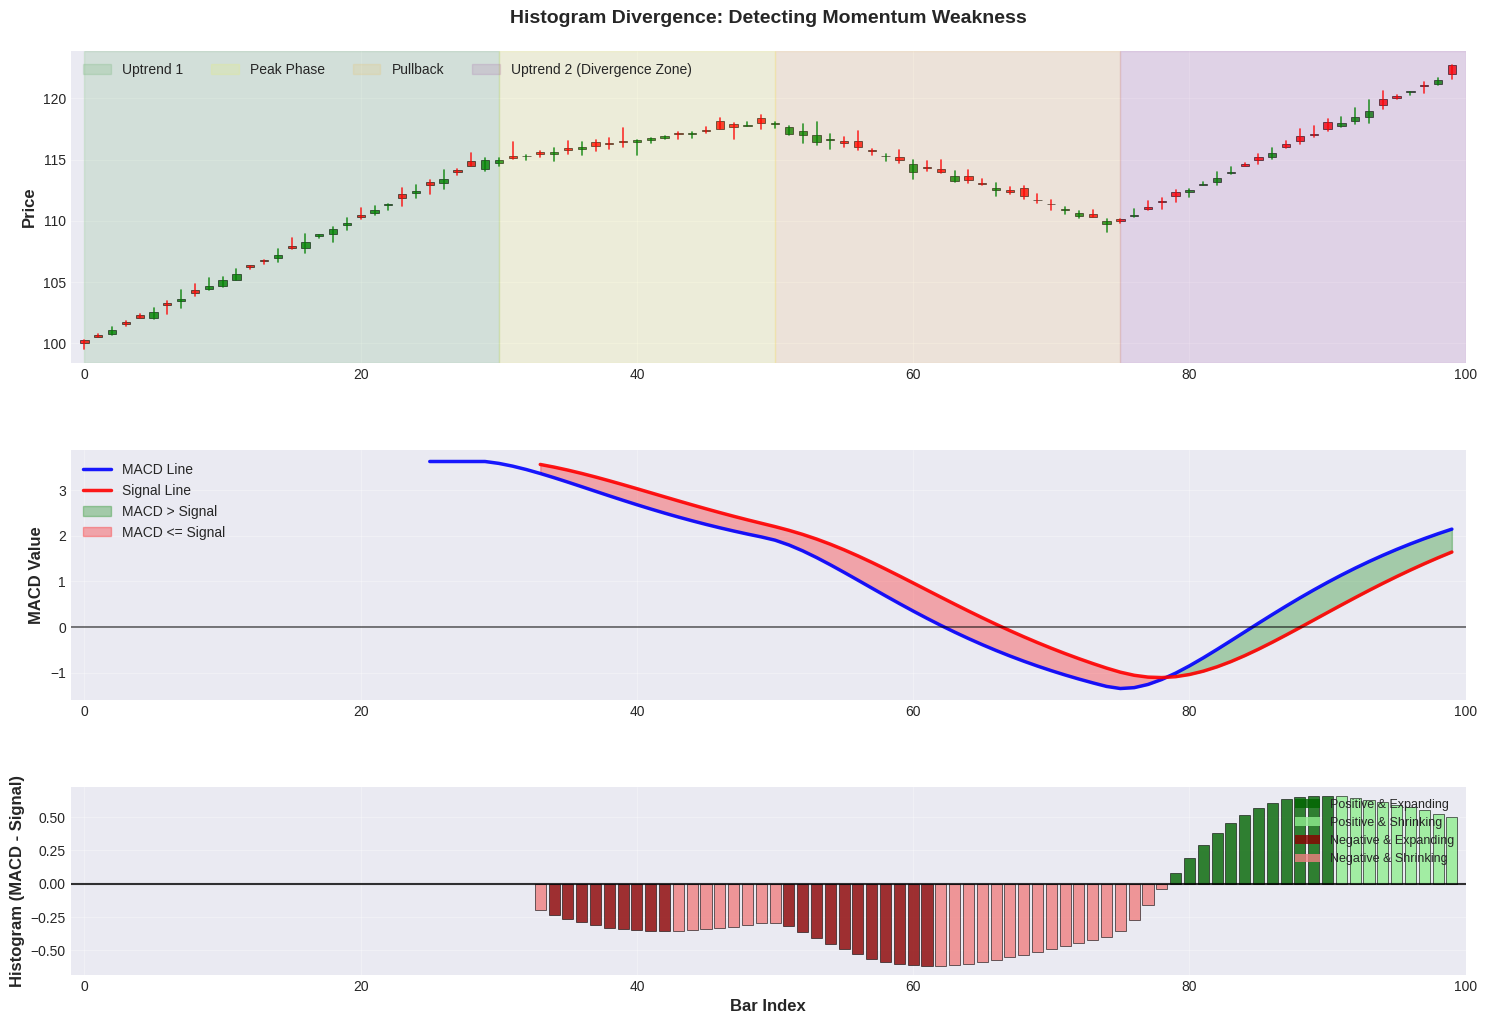


=== HISTOGRAM MOMENTUM ANALYSIS ===
Bars with Expanding Momentum: 32
Bars with Shrinking Momentum: 34

Max Histogram (Strongest Bullish): 0.660134
Min Histogram (Strongest Bearish): -0.619286

Histogram Range: [-0.619286, 0.660134]


In [3]:
# Create data with clear divergence: price makes new high but MACD doesn't
n2 = 100
dates2 = pd.date_range('2024-01-01 10:00', periods=n2, freq='5min')

# First strong uptrend
uptrend1 = np.linspace(100, 115, 30)
# Price makes higher high but momentum slows (divergence)
peak1 = np.linspace(115, 118, 20)
# Pull back
pullback = np.linspace(118, 110, 25)
# Another push higher (divergence signal)
uptrend2 = np.linspace(110, 122, 25)
closes2 = np.concatenate([uptrend1, peak1, pullback, uptrend2])

# Create OHLC
opens2 = closes2 + np.random.randn(n2) * 0.3
highs2 = np.maximum(opens2, closes2) + np.abs(np.random.randn(n2)) * 0.4
lows2 = np.minimum(opens2, closes2) - np.abs(np.random.randn(n2)) * 0.4
volumes2 = 1000 + np.abs(np.random.randn(n2)) * 200

df2 = pd.DataFrame({
    'open': opens2,
    'high': highs2,
    'low': lows2,
    'close': closes2,
    'volume': volumes2
}, index=dates2)

# Calculate MACD
result2 = macd(df2['close'])
df2 = pd.concat([df2, result2], axis=1)

# Detect histogram shrinking (momentum weakness)
histogram_abs = df2['macd_histogram'].abs()
histogram_shrinking = histogram_abs < histogram_abs.shift(1).fillna(histogram_abs.iloc[0])
histogram_expanding = histogram_abs > histogram_abs.shift(1).fillna(histogram_abs.iloc[0])

# Create visualization
fig = plt.figure(figsize=(18, 12))
gs = GridSpec(3, 1, height_ratios=[2.5, 2, 1.5], hspace=0.35)
ax1 = fig.add_subplot(gs[0])
ax2 = fig.add_subplot(gs[1], sharex=ax1)
ax3 = fig.add_subplot(gs[2], sharex=ax1)

# Panel 1: Price
for i in range(len(df2)):
    color = 'green' if df2['close'].iloc[i] >= df2['open'].iloc[i] else 'red'
    ax1.plot([i, i], [df2['low'].iloc[i], df2['high'].iloc[i]], color=color, linewidth=1.2, alpha=0.8)
    height = abs(df2['close'].iloc[i] - df2['open'].iloc[i])
    if height < 0.05:
        height = 0.15
    bottom = min(df2['open'].iloc[i], df2['close'].iloc[i])
    ax1.add_patch(plt.Rectangle((i - 0.3, bottom), 0.6, height, facecolor=color, edgecolor='black', linewidth=0.5, alpha=0.8))

ax1.axvspan(0, 30, alpha=0.1, color='green', label='Uptrend 1')
ax1.axvspan(30, 50, alpha=0.1, color='yellow', label='Peak Phase')
ax1.axvspan(50, 75, alpha=0.1, color='orange', label='Pullback')
ax1.axvspan(75, 100, alpha=0.1, color='purple', label='Uptrend 2 (Divergence Zone)')

ax1.set_ylabel('Price', fontsize=12, fontweight='bold')
ax1.set_title('Histogram Divergence: Detecting Momentum Weakness', fontsize=14, fontweight='bold', pad=20)
ax1.grid(True, alpha=0.3)
ax1.legend(loc='upper left', ncol=4, fontsize=10)
ax1.set_xlim(-1, len(df2))

# Panel 2: MACD and Signal
ax2.plot(range(len(df2)), df2['macd'].values, 'b-', linewidth=2.5, label='MACD Line', alpha=0.9)
ax2.plot(range(len(df2)), df2['macd_signal'].values, 'r-', linewidth=2.5, label='Signal Line', alpha=0.9)
ax2.axhline(0, color='black', linestyle='-', linewidth=1.2, alpha=0.6)
ax2.fill_between(range(len(df2)), df2['macd'].values, df2['macd_signal'].values, 
                   where=(df2['macd'] > df2['macd_signal']), alpha=0.3, color='green', label='MACD > Signal')
ax2.fill_between(range(len(df2)), df2['macd'].values, df2['macd_signal'].values, 
                   where=(df2['macd'] <= df2['macd_signal']), alpha=0.3, color='red', label='MACD <= Signal')

ax2.set_ylabel('MACD Value', fontsize=12, fontweight='bold')
ax2.grid(True, alpha=0.3)
ax2.legend(loc='upper left', fontsize=10)
ax2.set_xlim(-1, len(df2))

# Panel 3: Histogram with expansion/contraction
histogram2 = df2['macd_histogram'].values
colors_hist2 = []
for i, h in enumerate(histogram2):
    if h > 0:
        colors_hist2.append('darkgreen' if histogram_expanding.iloc[i] else 'lightgreen')
    else:
        colors_hist2.append('darkred' if histogram_expanding.iloc[i] else 'lightcoral')

ax3.bar(range(len(df2)), histogram2, color=colors_hist2, alpha=0.8, edgecolor='black', linewidth=0.5)
ax3.axhline(0, color='black', linestyle='-', linewidth=1.5, alpha=0.8)
ax3.set_xlabel('Bar Index', fontsize=12, fontweight='bold')
ax3.set_ylabel('Histogram (MACD - Signal)', fontsize=12, fontweight='bold')
ax3.grid(True, alpha=0.3)
ax3.set_xlim(-1, len(df2))

# Add legend for histogram
from matplotlib.patches import Patch
legend_elements = [
    Patch(facecolor='darkgreen', alpha=0.8, label='Positive & Expanding'),
    Patch(facecolor='lightgreen', alpha=0.8, label='Positive & Shrinking'),
    Patch(facecolor='darkred', alpha=0.8, label='Negative & Expanding'),
    Patch(facecolor='lightcoral', alpha=0.8, label='Negative & Shrinking')
]
ax3.legend(handles=legend_elements, loc='upper right', fontsize=9)

plt.tight_layout()
plt.show()

# Analysis
print('\n=== HISTOGRAM MOMENTUM ANALYSIS ===')
print(f'Bars with Expanding Momentum: {histogram_expanding.sum()}')
print(f'Bars with Shrinking Momentum: {histogram_shrinking.sum()}')
print(f'\nMax Histogram (Strongest Bullish): {df2["macd_histogram"].max():.6f}')
print(f'Min Histogram (Strongest Bearish): {df2["macd_histogram"].min():.6f}')
print(f'\nHistogram Range: [{df2["macd_histogram"].min():.6f}, {df2["macd_histogram"].max():.6f}]')

## Key Takeaways

### MACD Interpretation

**MACD Line (Blue):**
- Shows the difference between fast (12) and slow (26) EMAs
- Positive = bullish momentum, Negative = bearish momentum
- Zero crossover = major trend change

**Signal Line (Red):**
- 9-period EMA of the MACD line
- Represents consensus momentum
- Acts as a filter for MACD signals

**Histogram (Bar Chart):**
- Visual representation of MACD minus Signal
- Positive histogram = MACD above signal (bullish momentum)
- Expanding bars = momentum strengthening
- Shrinking bars = momentum weakening (early reversal warning)

### Crossover Signals

1. **Signal Line Crossover** (Most Common)
   - **Bullish**: MACD crosses above signal line
   - **Bearish**: MACD crosses below signal line
   - Reliability: 60-70% in trending markets
   - Best used with support/resistance and volume

2. **Zero Line Crossover** (Trend Confirmation)
   - **Bullish**: MACD crosses above zero
   - **Bearish**: MACD crosses below zero
   - Indicates shift from bearish to bullish momentum
   - Stronger signal, less whipsaw

3. **Histogram Divergence** (Early Warning)
   - Expanding histogram = trend strengthening
   - Shrinking histogram = trend weakening
   - Can precede actual crossover by 2-5 bars
   - Excellent for early entry/exit decisions

### Histogram Interpretation

- **Positive & Growing**: Strongest bullish phase (momentum accelerating up)
- **Positive & Shrinking**: Bullish weakness (momentum decelerating, caution)
- **Negative & Shrinking**: Bearish weakness (momentum decelerating down, watch for bounce)
- **Negative & Growing**: Strongest bearish phase (momentum accelerating down)

**Trading Implications:**
- Growing histogram = maintain position
- Shrinking histogram = prepare to close position
- Histogram turns positive = bullish signal confirmation
- Histogram turns negative = bearish signal confirmation

### Parameter Selection

**Standard Parameters (12, 26, 9):**
- Designed for daily timeframes
- Good general-purpose settings
- Reliable but slower to react

**For Intraday/Fast Markets:**
- Try (5, 13, 5) - faster, more signals, more whipsaw
- Try (8, 17, 9) - balance between speed and reliability

**For Longer Timeframes:**
- Try (12, 26, 9) - standard, proven
- Try (20, 40, 9) - slower, fewer but higher quality signals

**Optimization Guidelines:**
- Fast period should be 30-50% of slow period
- Signal period is usually 9 (good default)
- Test on your specific market and timeframe
- Adjust for asset volatility

### Common Pitfalls

1. **Whipsaw in Consolidation**: MACD generates false signals in sideways markets
   - Solution: Confirm with support/resistance, volume

2. **Lagging Signals**: MACD is a trend-following indicator, not leading
   - Solution: Combine with oscillators (RSI, Stochastic) for confirmation

3. **Divergence Misinterpretation**: Not all divergences lead to reversals
   - Solution: Validate with price action and other indicators

4. **Parameter Optimization**: Over-optimization reduces real-world performance
   - Solution: Use standard parameters or test extensively on out-of-sample data

### Best Practices

1. **Confirm Signals**: Combine MACD with price action (breaks, bounces)
2. **Use Multiple Timeframes**: Confirm signals on higher timeframes first
3. **Watch Volume**: Volume confirmation strengthens MACD signals
4. **Monitor Histogram**: Watch histogram shrinking as early exit signal
5. **Avoid Consolidation**: Best results in trending markets, use filters for ranges
6. **Risk Management**: Always use stop-losses, don't rely on MACD alone
7. **Divergence Hunting**: Look for price/MACD divergences at support/resistance

### Strategy Framework

**Basic Entry:**
1. Wait for MACD > Signal (bullish alignment)
2. Confirm with price making higher highs
3. Check histogram is expanding (momentum strengthening)
4. Enter on break of resistance or pull-back

**Basic Exit:**
1. Watch histogram for shrinking (first warning)
2. Exit on MACD < Signal crossover (confirmation)
3. Or exit at profit target / support level
4. Use trailing stop if momentum is strong

**Advanced: Divergence Trading**
1. Price makes new high, MACD doesn't = bearish divergence (sell signal)
2. Price makes new low, MACD doesn't = bullish divergence (buy signal)
3. Most powerful at resistance/support levels
4. Requires 2-3 candles to confirm

## Feature Showcase: Safety & Configuration

In [4]:
# Configuration & Validation Showcase
# ---------------------------------------------------------
import pandas as pd
import numpy as np
from indikator import macd

# 1. Configuration with .Config()
print(f"--- Custom macd Configuration ---")
# Create a fully configured version of the indicator
# This factory pattern validates parameters at creation time
custom_macd = macd.Config(fast_period=10, slow_period=20).make()
print(f"Created: {custom_macd}")

# 2. Validation Safety
print(f"--- Input Validation Safety ---")
try:
    # Attempt to use invalid data (infinite values)
    invalid_data = pd.Series([100.0, float('inf'), 102.0]) # Infinite values
    print("Attempting calculation with invalid inputs...")
    macd(invalid_data)
except Exception as e:
    # The @validated decorator automatically catches the issue
    print(f"✓ Validator caught error as expected: {e}")


--- Custom macd Configuration ---
Created: macd(fast_period=10, slow_period=20, signal_period=9)
--- Input Validation Safety ---
Attempting calculation with invalid inputs...
✓ Validator caught error as expected: Validation failed for parameter 'data' in 'macd' (Finite): Data must be finite (contains Inf)
